In [4]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [5]:
def Imageread(path):
    face_array = []
    displaying_faces = []
    for images in glob.glob(path):
        face_image = Image.open(images)
        displaying_faces.append(face_image)
        face_image = np.asarray(face_image, dtype=float) / 255.0
        face_array.append(face_image)
    face_array = np.asarray(face_array)
    fig1, axes_array = plt.subplots(2, 5)
    fig1.set_size_inches(5,2)
    count = 0
    for x in range(2):
        for y in range(5):
            draw = displaying_faces[count]
            draw = np.asarray(draw, dtype=float) / 255.0
            image_plot = axes_array[x][y].imshow(draw,cmap = plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
 
    plt.show()
    return face_array

Train Images


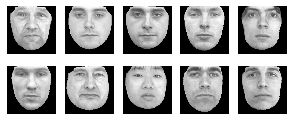

In [6]:
print("Train Images")
face_array = Imageread('face_data/Train1/*.bmp')


Test Images


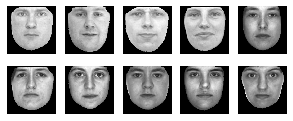

In [7]:
print("Test Images")
face_array1 = Imageread('face_data/Test/*.bmp')


In [8]:
img_shape = face_array[0].shape
print (img_shape)

(256, 256)


In [9]:
#============================== Train Images Flattening ========================================
imgs_mtrx=np.array([img.flatten() for img in face_array])
print("Train Flatten image shape: "+str(imgs_mtrx.shape))
mean_img = np.sum(imgs_mtrx, axis=0) / len(imgs_mtrx[0])
print ("Train Mean Image shape: "+ str(mean_img.shape))

Train Flatten image shape: (157, 65536)
Train Mean Image shape: (65536,)


In [10]:
#============================== Test Images Flattening ==========================================
imgs_mtrx_test=np.array([img.flatten() for img in face_array1])
print("Test Flatten image shape: "+str(imgs_mtrx_test.shape))
mean_img_test = np.sum(imgs_mtrx_test, axis=0) / len(imgs_mtrx_test[0])
print ("Test Mean Image shape: "+str(mean_img_test.shape))

Test Flatten image shape: (20, 65536)
Test Mean Image shape: (65536,)


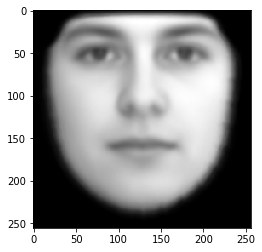

In [11]:
mean_img_2d = mean_img.reshape(img_shape)
plt.imshow(mean_img_2d, cmap="gray")

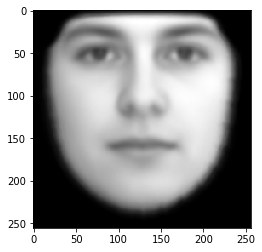

In [12]:
#================================ Test Mean ============================
mean_img_2d_test = mean_img_test.reshape(img_shape)
plt.imshow(mean_img_2d, cmap="gray")

In [13]:
# for c_idx in range(imgs_mtrx.shape[1]):
#     imgs_mtrx[:, c_idx] = imgs_mtrx[:, c_idx] - mean_img
imgs_mtrx1 = np.subtract(imgs_mtrx, mean_img)
print ("Image - Mean Shape: "+str(imgs_mtrx1.shape))

Image - Mean Shape: (157, 65536)


In [15]:
A = imgs_mtrx1

EIGEN FACES


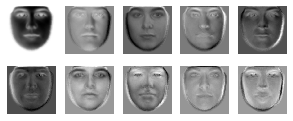

In [16]:
U, s, V = np.linalg.svd(A, full_matrices=False)
Eigen_faces = []
for x in range(V.shape[0]):
    fig = np.reshape(V[x], (256, 256))
    Eigen_faces.append(fig)
print("EIGEN FACES")
fig3, axes_array = plt.subplots(2, 5)
fig3.set_size_inches(5, 2)
count = 0
for x in range(2):
    for y in range(5):
        draw_image = Eigen_faces[count]
        image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
        axes_array[x][y].axis('off')
        count = count + 1
fig3.canvas.set_window_title('Eigen Faces')
plt.show()


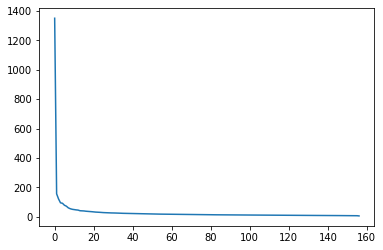

In [17]:
plt.plot(s)
efaces = U [:,0:10] #if you want to limit no. of efaces, do it here

In [18]:
weights = np.dot(A,V.T)
print ("V shape: "+str(V.shape))
print ("A shape: "+str(A.shape))

V shape: (157, 65536)
A shape: (157, 65536)


Reconstructed Image Shape: (157, 65536)
Reconstructed Test Images


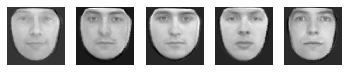

In [19]:
#================================ Training Reconstruction with K =30 ===========================================================
k=30
recons_imgs = list()
# for c_idx in range(imgs_mtrx.shape[1]):
ri = mean_img + np.dot(weights[:, 0:k],V[0:k ,:])
print("Reconstructed Image Shape: " + str(ri.shape))

# recons_imgs.append(ri.reshape(img_shape))
print("Reconstructed Test Images")
fig1, axes_array = plt.subplots(1,5)
count=0
for x in range(5):
        draw_image = np.reshape(ri[count, :], (256, 256))
        draw_image = np.asarray(draw_image,dtype = float)/255.0
        image_plot = axes_array[x].imshow(draw_image,cmap = plt.cm.gray)
        axes_array[x].axis('off')
        count = count + 1
plt.show()

In [20]:
#=============================== Test Mean Subtraction =================================================
test_from_mean = np.subtract(imgs_mtrx_test, mean_img_test)

C:\Users\anmol\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


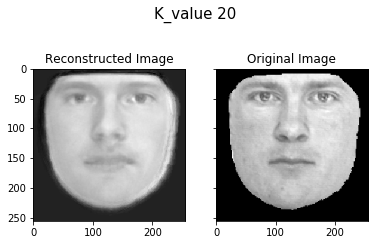

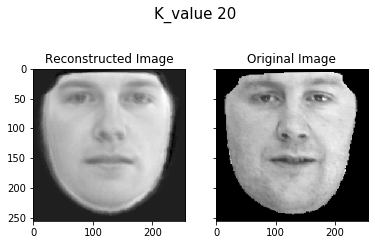

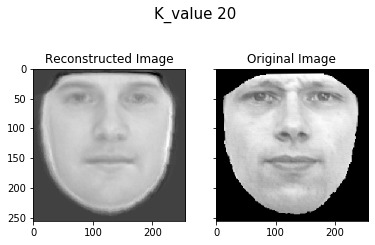

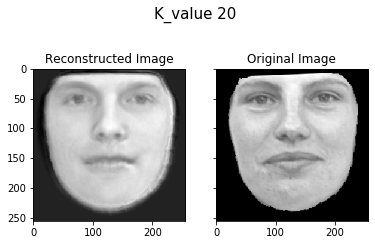

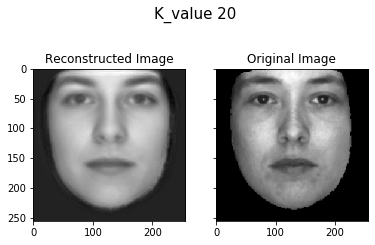

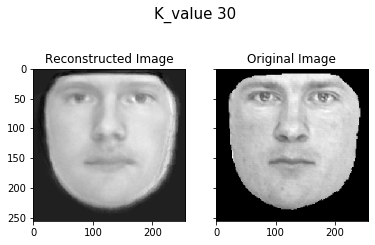

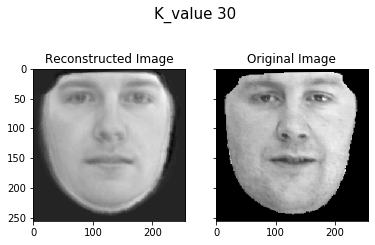

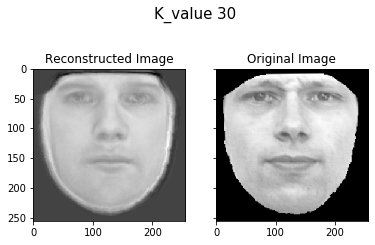

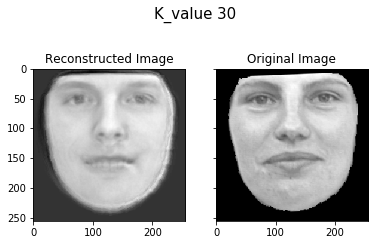

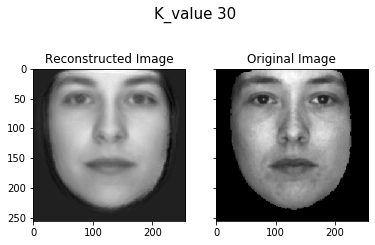

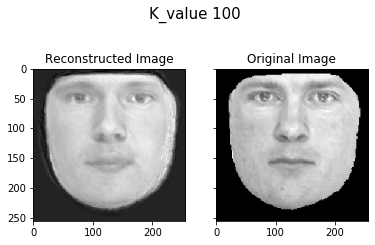

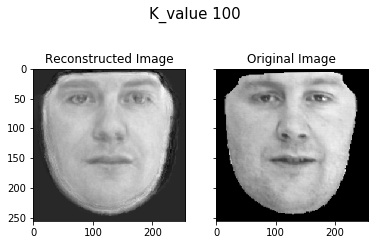

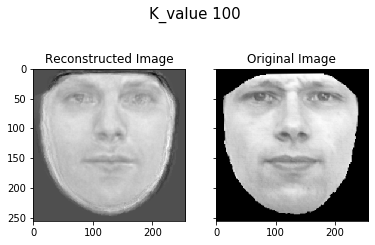

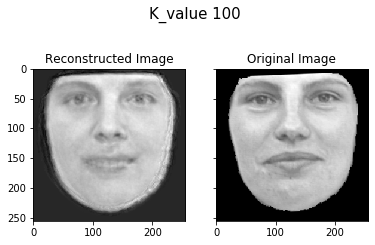

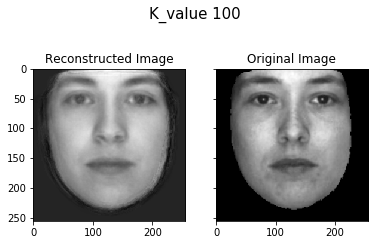

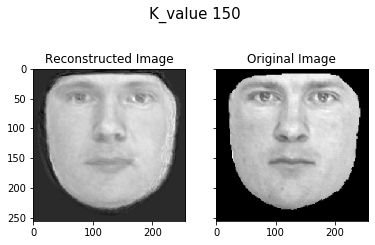

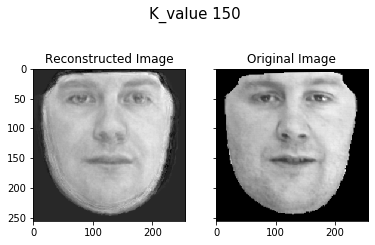

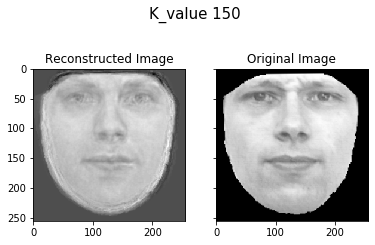

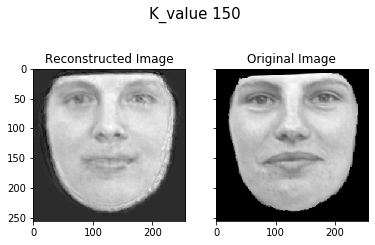

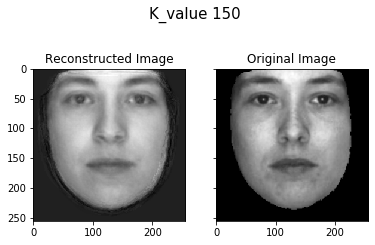

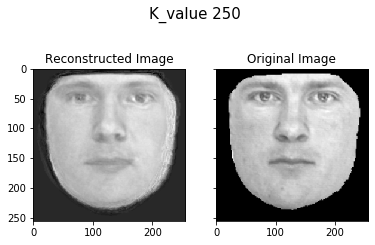

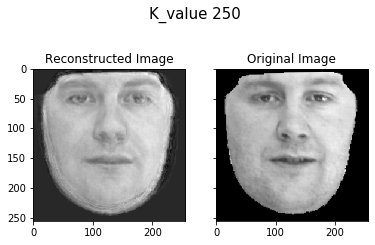

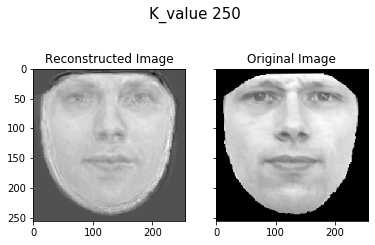

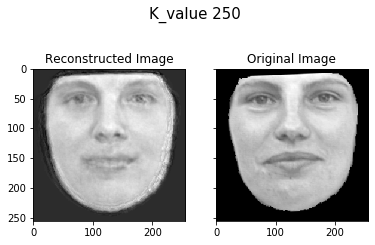

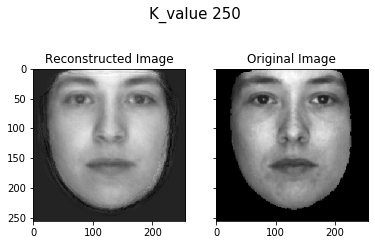

In [21]:
#================================ Reconstructed Test Images from Train ===================================
weights_test = np.dot(test_from_mean,V.T)
# print (V.shape)
# print (test_from_mean.shape)
k_values = [20,30,100,150,250]
img = imgs_mtrx1[1]
ri1 = []
error2 = []
for k in range(len(k_values)):
    recons_imgs = list()
    # for c_idx in range(imgs_mtrx.shape[1]):
    ri = mean_img + np.dot(weights_test[:, 0:k_values[k]],V[0:k_values[k] ,:])
    for count in range(5):
        draw_image = np.reshape(ri[count, :], (256, 256))
        draw_image = np.asarray(draw_image,dtype = float)/255.0
        to_plot = np.reshape(imgs_mtrx_test[count,:], (256, 256))
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        f.suptitle("K_value "+ str(k_values[k]), fontsize=15)
        ax1.imshow(draw_image,cmap=plt.cm.gray)
        ax1.set_title('Reconstructed Image')
        ax2.imshow(to_plot,cmap=plt.cm.gray)
        ax2.set_title('Original Image')
        count = count+1

In [50]:
#     eigen_weights = np.dot(V[:k, :], substract_mean_from_original.T)
#     threshold = 6000
#     for i in range(test_from_mean.shape[0]):
#         test_weight = np.dot(V[:k, :], test_from_mean[i:i+1, :].T)
#         distances_euclidian = np.sum((eigen_weights - test_weight) ** 2, axis=0)
#         image_closest = np.argmin(np.sqrt(distances_euclidian))
#         return image_closest
#         fig, axes_array = plt.subplots(1, 2)
#         fig.set_size_inches(5, 5)
#         to_plot = np.reshape(test_flat_images[i,:], (256, 256))
#         axes_array[0].imshow(to_plot, cmap=plt.cm.gray)
#         axes_array[0].axis('off')
#         if ((distances_euclidian[image_closest] <= threshold)):
#             axes_array[1].imshow(face_array[image_closest, :, :], cmap=plt.cm.gray)
#         axes_array[1].axis('off')
#     plt.show()

In [22]:
#============================== Reconstruction error ==============================================
k_values = [10,20,30,40,100,150]
img = imgs_mtrx1[1]
ri1 = []
error1 = []
for k in range(len(k_values)):
    recons_imgs = list()
    # for c_idx in range(imgs_mtrx.shape[1]):
    ri = mean_img + np.dot(weights[:, 0:k_values[k]],V[0:k_values[k] ,:])
#     print(ri.shape)
#     print(k_values[k])
    recon_error = abs(ri-img)
    # print(imgs_mtrx[1].shape)
#     print(recon_error.shape)
    recon_error1 = max(recon_error[1])
    error = recon_error1**2/len(face_array)*100
    error1.append(error)

In [23]:
recon_error = abs(ri-img)
# print(imgs_mtrx[1].shape)
recon_error1 = max(recon_error[1])
error = recon_error1**2/len(face_array)*100

In [24]:
print("Reconstruction Error Matix: "+str(recon_error.shape))

Reconstruction Error Matix: (157, 65536)


In [25]:
print("Error List")
print(error1)

Error List
[0.14609775816755696, 0.12004569181423601, 0.1097273524869068, 0.09318113221295989, 0.06435311929416, 0.011456832535968032]


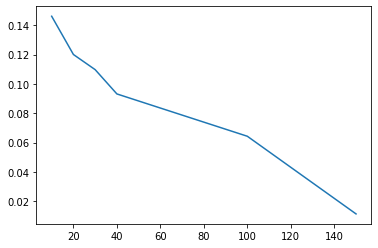

In [26]:
#================================ Plotting the Error rate graph ================================================ 

plt.plot(np.array(k_values),np.array(error1))
# #     plt.plot(np.array(k_values),np.array(errorrate_list),'b')
plt.axis()
plt.show()